In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
# Load Data
df = pd.read_csv("BankLiquidityRiskDetection.csv")

In [14]:

# Drop unnecessary index column if present
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

In [15]:

# Convert REPORTINGDATE to datetime with correct format
df['REPORTINGDATE'] = pd.to_datetime(df['REPORTINGDATE'], dayfirst=True)


In [16]:
# Basic Info
print("Basic Info:\n")
print(df.info())


Basic Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20878 entries, 0 to 20877
Data columns (total 50 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   REPORTINGDATE                         20878 non-null  datetime64[ns]
 1   INSTITUTIONCODE                       20878 non-null  object        
 2   01_CURR_ACC                           20878 non-null  float64       
 3   02_TIME_DEPOSIT                       20878 non-null  float64       
 4   03_SAVINGS                            20878 non-null  float64       
 5   04_OTHER_DEPOSITS                     20878 non-null  float64       
 6   05_BANKS_DEPOSITS                     20878 non-null  float64       
 7   06_BORROWING_FROM_PUBLIC              20878 non-null  float64       
 8   07_INTERBANKS_LOAN_PAYABLE            20878 non-null  float64       
 9   08_CHEQUES_ISSUED                     20878 non-null  float

In [17]:
# Summary statistics
print("\nSummary Statistics:\n")
print(df.describe())



Summary Statistics:

                       REPORTINGDATE   01_CURR_ACC  02_TIME_DEPOSIT  \
count                          20878  2.087800e+04     2.087800e+04   
mean   2016-04-08 17:55:41.354535680  1.903076e+11     8.286265e+10   
min              2010-02-05 00:00:00 -1.653387e+09     0.000000e+00   
25%              2013-06-07 00:00:00  9.294392e+09     1.933121e+10   
50%              2016-06-03 00:00:00  3.198321e+10     5.197009e+10   
75%              2019-02-22 00:00:00  1.196445e+11     9.899396e+10   
max              2021-12-31 00:00:00  4.812640e+12     9.380550e+11   
std                              NaN  5.082489e+11     1.170042e+11   

         03_SAVINGS  04_OTHER_DEPOSITS  05_BANKS_DEPOSITS  \
count  2.087800e+04       2.087800e+04       2.087800e+04   
mean   8.239825e+10       3.461206e+09       1.150649e+10   
min   -2.714304e+10      -9.137562e+09      -1.852718e+10   
25%    5.387689e+09       0.000000e+00       0.000000e+00   
50%    1.679833e+10       2.44983

In [18]:
# Missing values check
print("\nMissing Values:\n")
print(df.isnull().sum().sort_values(ascending=False))



Missing Values:

REPORTINGDATE                           0
EWAQ_Capital                            0
26_PROMISSORY_NOTES                     0
XX_CUSTOMER_DEPOSITS                    0
XX_TOTAL_LIQUID_LIAB                    0
XX_BOT_BALANCE                          0
XX_BAL_IN_OTHER_BANKS                   0
XX_TOTAL_LIQUID_ASSET                   0
XX_MLA                                  0
F077_ASSETS_TOTAL                       0
F125_LIAB_TOTAL                         0
EWAQ_GrossLoans                         0
EWAQ_NPL                                0
INSTITUTIONCODE                         0
EWAQ_NPLsNetOfProvisions                0
EWAQ_NPLsNetOfProvisions2CoreCapital    0
LR                                      0
DR                                      0
IBCM                                    0
GDP                                     0
INF                                     0
EWL_LIQUIDITY RATING                    0
MLA                                     0
MLA_CLASS2      

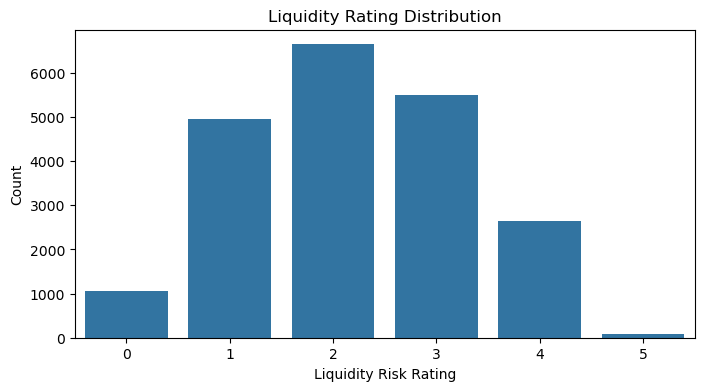

In [19]:
# Liquidity Rating Distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='EWL_LIQUIDITY RATING', data=df)
plt.title("Liquidity Rating Distribution")
plt.xlabel("Liquidity Risk Rating")
plt.ylabel("Count")
plt.show()


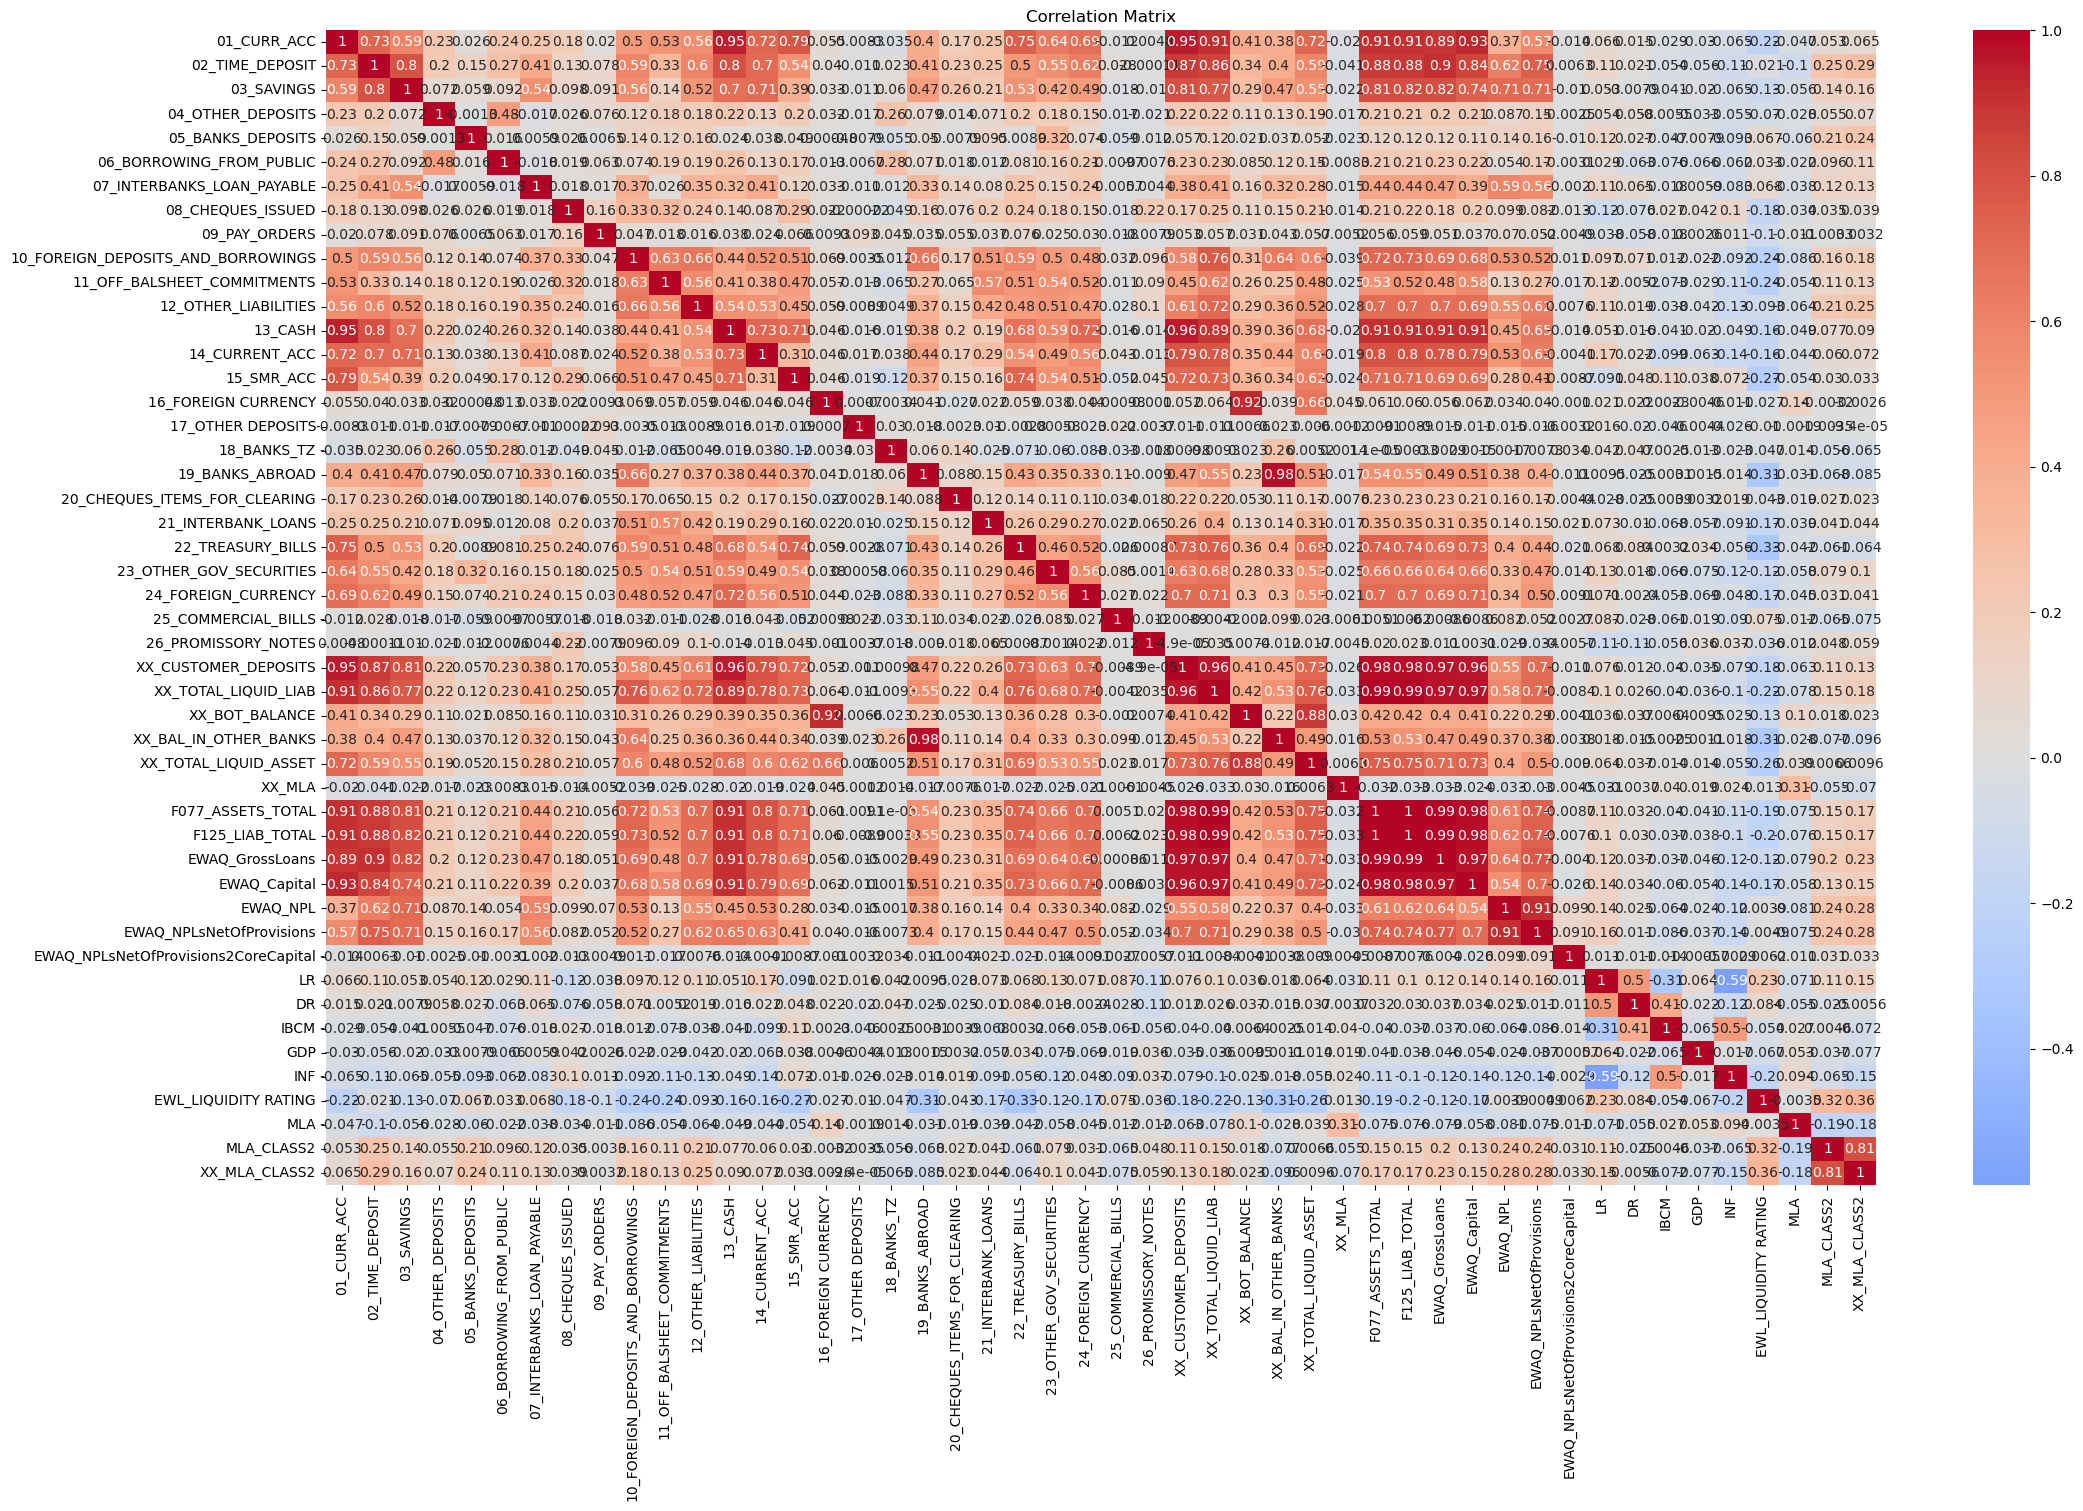

In [23]:
# Correlation Heatmap
plt.figure(figsize=(25, 15))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, cmap="coolwarm", center=0, annot=True)
plt.title("Correlation Matrix")
plt.show()



In [24]:
# Top and bottom correlated features with the target
target_corr = corr["EWL_LIQUIDITY RATING"].sort_values(ascending=False)
print("\nTop Correlated Features with Liquidity Rating:\n")
print(target_corr.head(10))
print("\nLowest Correlated Features with Liquidity Rating:\n")
print(target_corr.tail(10))



Top Correlated Features with Liquidity Rating:

EWL_LIQUIDITY RATING          1.000000
XX_MLA_CLASS2                 0.359376
MLA_CLASS2                    0.316026
LR                            0.225046
DR                            0.084190
25_COMMERCIAL_BILLS           0.075450
07_INTERBANKS_LOAN_PAYABLE    0.068055
05_BANKS_DEPOSITS             0.067107
06_BORROWING_FROM_PUBLIC      0.033070
XX_MLA                        0.013206
Name: EWL_LIQUIDITY RATING, dtype: float64

Lowest Correlated Features with Liquidity Rating:

F125_LIAB_TOTAL                      -0.197274
01_CURR_ACC                          -0.215027
XX_TOTAL_LIQUID_LIAB                 -0.218335
11_OFF_BALSHEET_COMMITMENTS          -0.243133
10_FOREIGN_DEPOSITS_AND_BORROWINGS   -0.243394
XX_TOTAL_LIQUID_ASSET                -0.257376
15_SMR_ACC                           -0.266861
XX_BAL_IN_OTHER_BANKS                -0.308973
19_BANKS_ABROAD                      -0.309649
22_TREASURY_BILLS                    -0.325

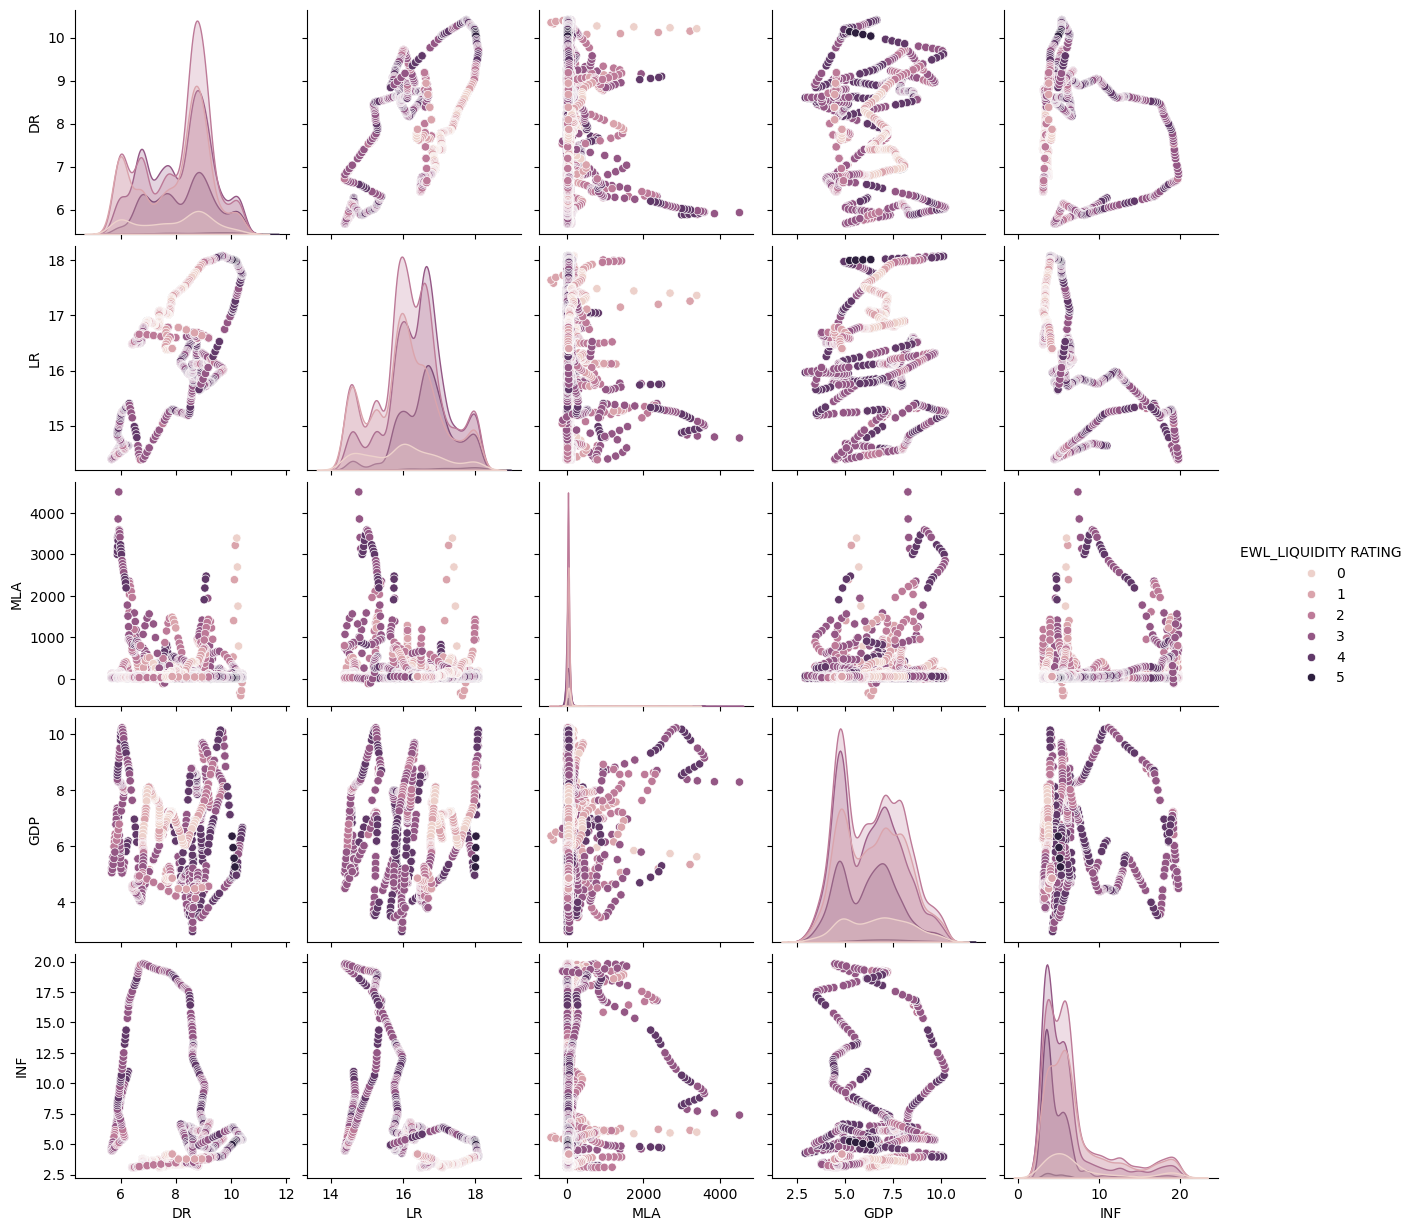

In [25]:
# Pairplot for key indicators
sample_cols = ['DR', 'LR', 'MLA', 'GDP', 'INF', 'EWL_LIQUIDITY RATING']
sns.pairplot(df[sample_cols], hue='EWL_LIQUIDITY RATING')
plt.show()


In [26]:
# Outlier Detection with Z-score
from scipy.stats import zscore
z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).sum(axis=0)
print("\nOutlier Count per Numeric Column:\n")
print(pd.Series(outliers, index=df.select_dtypes(include=[np.number]).columns).sort_values(ascending=False))



Outlier Count per Numeric Column:

XX_CUSTOMER_DEPOSITS                    750
15_SMR_ACC                              732
F125_LIAB_TOTAL                         725
EWAQ_GrossLoans                         720
XX_TOTAL_LIQUID_LIAB                    718
EWAQ_Capital                            705
F077_ASSETS_TOTAL                       704
13_CASH                                 680
11_OFF_BALSHEET_COMMITMENTS             658
01_CURR_ACC                             630
XX_BAL_IN_OTHER_BANKS                   623
22_TREASURY_BILLS                       602
INF                                     601
19_BANKS_ABROAD                         599
02_TIME_DEPOSIT                         587
12_OTHER_LIABILITIES                    579
EWAQ_NPLsNetOfProvisions                568
05_BANKS_DEPOSITS                       566
MLA_CLASS2                              553
14_CURRENT_ACC                          534
23_OTHER_GOV_SECURITIES                 514
10_FOREIGN_DEPOSITS_AND_BORROWINGS      

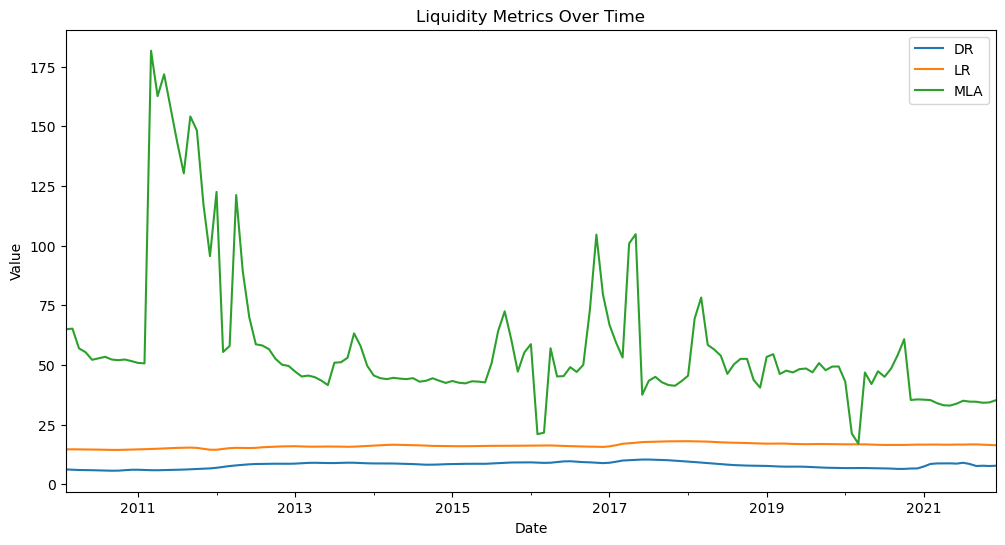

In [27]:
# Time-based trend analysis (Monthly)
df['Month'] = df['REPORTINGDATE'].dt.to_period('M')
df_monthly = df.groupby('Month').mean(numeric_only=True)
df_monthly[['DR', 'LR', 'MLA']].plot(figsize=(12, 6), title="Liquidity Metrics Over Time")
plt.ylabel("Value")
plt.xlabel("Date")
plt.show()


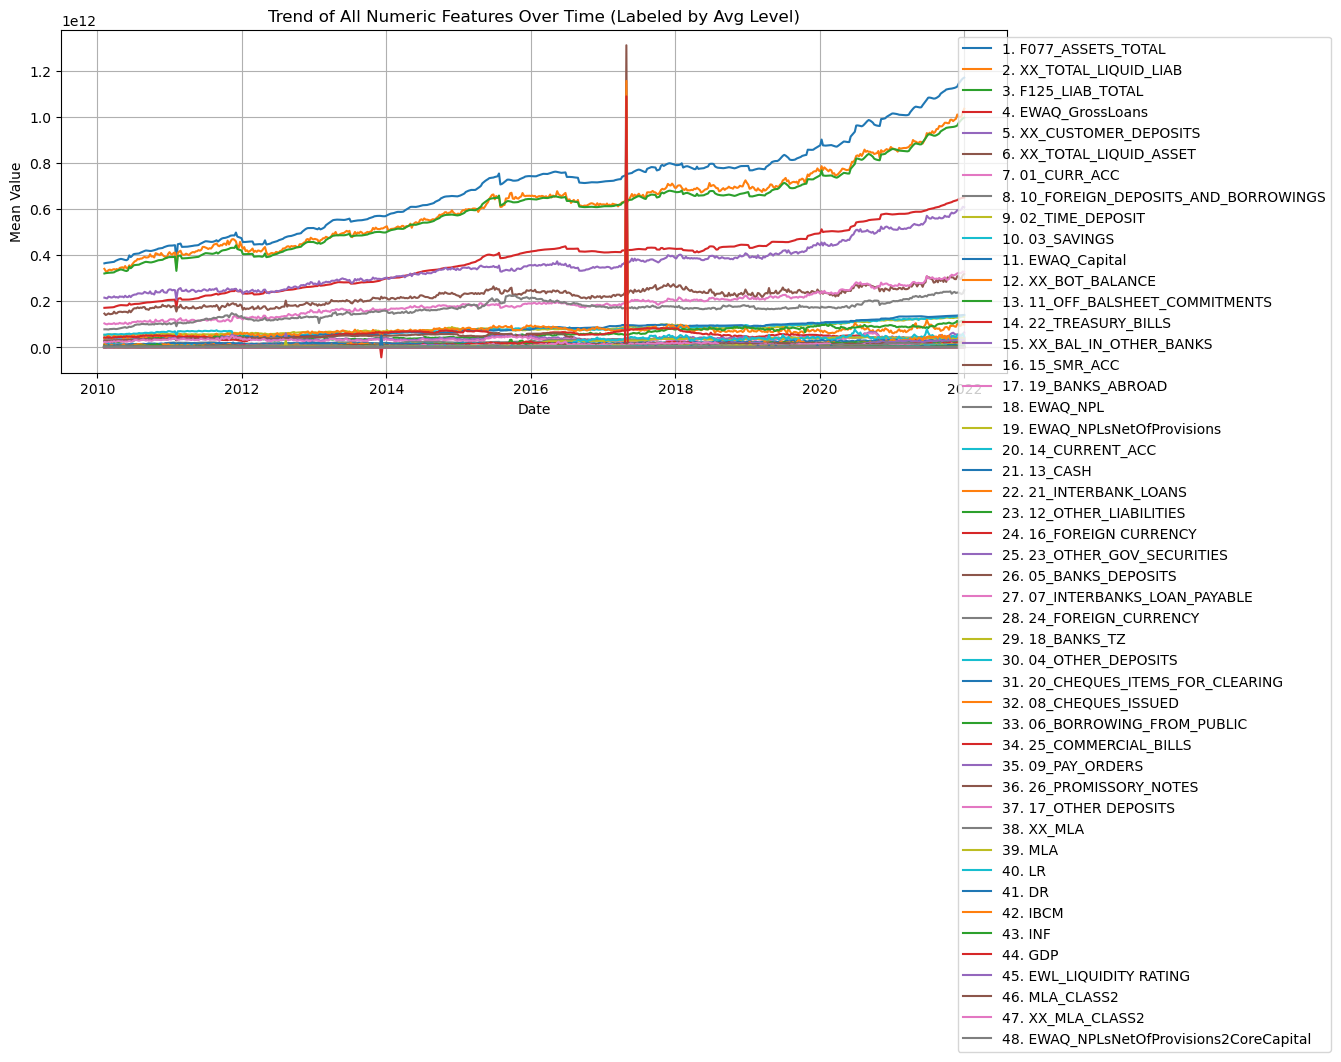

Ranking of Variables by Mean Value Over Time:

F077_ASSETS_TOTAL                       6.948597e+11
XX_TOTAL_LIQUID_LIAB                    6.133241e+11
F125_LIAB_TOTAL                         5.984700e+11
EWAQ_GrossLoans                         3.785752e+11
XX_CUSTOMER_DEPOSITS                    3.545131e+11
XX_TOTAL_LIQUID_ASSET                   2.243129e+11
01_CURR_ACC                             1.876073e+11
10_FOREIGN_DEPOSITS_AND_BORROWINGS      1.641460e+11
02_TIME_DEPOSIT                         8.196624e+10
03_SAVINGS                              8.150673e+10
EWAQ_Capital                            8.022915e+10
XX_BOT_BALANCE                          7.276513e+10
11_OFF_BALSHEET_COMMITMENTS             5.924612e+10
22_TREASURY_BILLS                       5.373063e+10
XX_BAL_IN_OTHER_BANKS                   3.960714e+10
15_SMR_ACC                              3.595412e+10
19_BANKS_ABROAD                         3.438282e+10
EWAQ_NPL                                2.900275e+10

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Get all numeric columns
numeric_columns = df.select_dtypes(include='number').columns.tolist()

# Step 2: Group by time and compute mean
df_timegrouped = df.groupby('REPORTINGDATE')[numeric_columns].mean()

# Step 3: Compute the average value of each variable across time
trend_means = df_timegrouped.mean().sort_values(ascending=False)

# Step 4: Plot with ranking labels
plt.figure(figsize=(14, 8))
for i, col in enumerate(trend_means.index):
    plt.plot(df_timegrouped.index, df_timegrouped[col], label=f"{i+1}. {col}")

plt.title("Trend of All Numeric Features Over Time (Labeled by Avg Level)")
plt.xlabel("Date")
plt.ylabel("Mean Value")
plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1.0))  # push legend outside for clarity
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: print ranked list
print("Ranking of Variables by Mean Value Over Time:\n")
print(trend_means)
